In [3]:
import pandas as pd
import openpyxl
import random
import pandas as pd

# 打开Excel文件
workbook = openpyxl.load_workbook('test/test.xlsx')

# 选择要操作的工作表
sheet = workbook.active  # 或者使用 sheet = workbook['Sheet1'] 选择特定的工作表

# 读取表格内容并保存为Pandas DataFrame
data = []
header = [cell.value for cell in sheet[1]]  # 假设表头在第一行
for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
    row_values = [cell.value for cell in row]
    data.append(row_values)

# 创建DataFrame
df_test = pd.DataFrame(data, columns=header)

# 打印DataFrame
print(df_test)

# 关闭Excel文件
workbook.close()

   source ID  T1548  T1134  T1531  T1087  T1098  T1583  T1595  T1557  T1071  \
0      G0076      0      0      0      0      0      0      0      0      0   
1      G0131      0      0      0      0      0      0      0      0      0   
2      G0134      0      0      0      0      0      1      0      0      0   
3      G0081      0      0      0      0      0      0      0      0      1   
4      G0010      0      1      0      1      0      1      0      0      1   
5      G0123      0      0      0      0      0      0      1      0      0   
6      G0090      0      0      0      0      0      0      0      0      1   
7      G0107      0      0      0      0      0      0      0      0      0   
8      G0124      0      0      0      0      0      0      0      0      0   
9      G0112      0      0      0      0      0      0      0      0      1   
10     G0044      0      0      0      0      0      1      0      0      0   
11     G0102      0      0      0      1      0     

In [4]:
# 读取 Excel 文件
df = pd.read_excel('../DataSource/technique_relations_cluster_data_pre0_cutoff4.xlsx', sheet_name='inner_relationship')

# 创建一个空字典来存储关系
technique_relations = {}

# 遍历 DataFrame 中的每一行
for index, row in df.iterrows():
    technique_id_1 = row['technique_id_1']
    technique_id_2 = row['technique_id_2']

    # 将关系添加到字典中
    if technique_id_1 in technique_relations:
        technique_relations[technique_id_1].append(technique_id_2)
    else:
        technique_relations[technique_id_1] = [technique_id_2]

    if technique_id_2 in technique_relations:
        technique_relations[technique_id_2].append(technique_id_1)
    else:
        technique_relations[technique_id_2] = [technique_id_1]

# 去除重复关系
for key in technique_relations:
    technique_relations[key] = list(set(technique_relations[key]))

# 输出字典
print(technique_relations)

{'T1090': ['T1059', 'T1140', 'T1083', 'T1105', 'T1555', 'T1102', 'T1048', 'T1218', 'T1553', 'T1560', 'T1189', 'T1021', 'T1053', 'T1071', 'T1566', 'T1016', 'T1082', 'T1001', 'T1036', 'T1068', 'T1018', 'T1574', 'T1005', 'T1204', 'T1047', 'T1588', 'T1547', 'T1027', 'T1552', 'T1546', 'T1033', 'T1583', 'T1134', 'T1203', 'T1070', 'T1078', 'T1197', 'T1057', 'T1003'], 'T1018': ['T1059', 'T1140', 'T1083', 'T1105', 'T1102', 'T1218', 'T1560', 'T1189', 'T1021', 'T1053', 'T1071', 'T1090', 'T1566', 'T1110', 'T1016', 'T1082', 'T1036', 'T1574', 'T1018', 'T1005', 'T1204', 'T1047', 'T1588', 'T1547', 'T1027', 'T1074', 'T1056', 'T1033', 'T1583', 'T1087', 'T1203', 'T1070', 'T1078', 'T1057', 'T1003'], 'T1047': ['T1059', 'T1140', 'T1083', 'T1105', 'T1102', 'T1218', 'T1560', 'T1189', 'T1021', 'T1053', 'T1071', 'T1090', 'T1566', 'T1110', 'T1016', 'T1082', 'T1036', 'T1574', 'T1018', 'T1005', 'T1204', 'T1047', 'T1588', 'T1547', 'T1027', 'T1074', 'T1056', 'T1033', 'T1583', 'T1087', 'T1203', 'T1070', 'T1078', 'T10

### 单步

In [8]:
from collections import Counter

correct_count = 0
total_count = 0

for index, row in df_test.iterrows():
    source_id = row['source ID']
    techniques = [col for col in df_test.columns if col != 'source ID']
    
    # 在techniques中筛选出存在的技术
    existing_techniques = [technique for technique in techniques if row[technique] == 1]
    total_count += len(existing_techniques)
#     print(existing_techniques)
    
    # 如果存在技术，随机选择一个技术进行匹配
    if existing_techniques:
        random_technique = random.choice(existing_techniques)
#         print(random_technique)

        # 获取random_technique对应的related_techniques
        related_techniques = technique_relations.get(random_technique, [])
#         print(related_techniques)
        
        # 在related_techniques遍历元素进行二次匹配，与获取random_technique对应的related_techniques的逻辑相同，生成related_technique2
        
        # 使用Counter计算相同元素的数量 existing_techniques与related_technique2相比较
        common_elements_count = sum((Counter(existing_techniques) & Counter(related_techniques)).values())
        correct_count += common_elements_count
#         print(correct_count)
            
        accuracy = correct_count / total_count * 100
        print(f'准确率: {accuracy:.2f}%')
        
    correct_count = 0
    total_count = 0

准确率: 25.00%
准确率: 50.00%
准确率: 58.33%
准确率: 61.76%
准确率: 50.00%
准确率: 0.00%
准确率: 80.00%
准确率: 77.78%
准确率: 71.43%
准确率: 92.86%
准确率: 50.00%
准确率: 0.00%
准确率: 68.18%
准确率: 58.33%
准确率: 0.00%


In [15]:
import random
import json
from collections import Counter

# Read frequency information from frequency_id.json
with open('../clustering/frequency_id.json', 'r') as file:
    frequency_data = json.load(file)

correct_count = 0
total_count = 0

for index, row in df_test.iterrows():
    source_id = row['source ID']
    print(source_id)
    techniques = [col for col in df_test.columns if col != 'source ID']
    
    # In techniques, filter out the existing techniques
    existing_techniques = [technique for technique in techniques if row[technique] == 1]
    total_count += len(existing_techniques)
    
    # Filter high-frequency techniques with usage_count > 25
    high_frequency_techniques = [
        tech['technique_id'] for tech in frequency_data if tech['usage_count'] > 70
    ]
    # Flatten the list of lists into a single list of strings
    high_frequency_techniques = [item for sublist in high_frequency_techniques for item in sublist]
    
    # If there are existing techniques and high-frequency techniques, choose a random technique
    if existing_techniques and high_frequency_techniques:
        # Choose a random technique that is both in existing_techniques and in high_frequency_techniques
        common_techniques = list(set(existing_techniques) & set(high_frequency_techniques))
        print(common_techniques)
        if common_techniques:
            random_technique = random.choice(common_techniques)

            # Get the related techniques for the randomly chosen technique
            related_techniques = technique_relations.get(random_technique, [])

            # Use Counter to count the common elements between existing_techniques and related_techniques
            common_elements_count = sum((Counter(existing_techniques) & Counter(related_techniques)).values())
            correct_count += common_elements_count

            accuracy = correct_count / total_count * 100
            print(f'准确率: {accuracy:.2f}%')

    correct_count = 0
    total_count = 0

G0076
['T1059']
准确率: 25.00%
G0131
['T1566', 'T1059', 'T1204']
准确率: 50.00%
G0134
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 58.33%
G0081
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 52.94%
G0010
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 47.92%
G0123
[]
G0090
['T1566', 'T1059', 'T1204']
准确率: 80.00%
G0107
['T1059', 'T1204', 'T1027']
准确率: 77.78%
G0124
['T1059']
准确率: 71.43%
G0112
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 92.86%
G0044
[]
G0102
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 48.65%
G0128
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 68.18%
G0018
['T1566', 'T1059', 'T1204']
准确率: 58.33%
G0045
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 62.16%


## 多步

In [9]:
from collections import Counter

correct_count = 0
# total_count = 0

for index, row in df_test.iterrows():
    source_id = row['source ID']
    techniques = [col for col in df_test.columns if col != 'source ID']
    
    # 在techniques中筛选出存在的技术
    existing_techniques = [technique for technique in techniques if row[technique] == 1]
    total_count += len(existing_techniques)
#     print(existing_techniques)
    
    # 如果存在技术，随机选择一个技术进行匹配
    if existing_techniques:
        random_technique = random.choice(existing_techniques)
#         print(random_technique)

        # 获取random_technique对应的related_techniques
        related_techniques = technique_relations.get(random_technique, [])
        
        # 在related_techniques遍历元素进行二次匹配，与获取random_technique对应的related_techniques的逻辑相同，生成related_technique2
        related_technique2 = []
        for tech in related_techniques:
            related_technique2.extend(technique_relations.get(tech, []))
#         print(related_technique2)
        
        # 使用Counter计算相同元素的数量 existing_techniques 与 related_technique2 相比较
        common_elements_count = sum((Counter(existing_techniques) & Counter(related_technique2)).values())
        correct_count += common_elements_count
#         print(correct_count)
            
        accuracy = correct_count / total_count * 100
        print(f'准确率: {accuracy:.2f}%')
        
    correct_count = 0
    total_count = 0

准确率: 0.00%
准确率: 78.57%
准确率: 83.33%
准确率: 0.00%
准确率: 79.17%
准确率: 0.00%
准确率: 0.00%
准确率: 100.00%
准确率: 100.00%
准确率: 100.00%
准确率: 83.33%
准确率: 83.78%
准确率: 72.73%
准确率: 75.00%
准确率: 70.27%


In [16]:
import random
import json
from collections import Counter

# Read frequency infor.hmation from frequency_id.json
with open('../clustering/frequency_id.json', 'r') as file:
    frequency_data = json.load(file)

correct_count = 0
total_count = 0

for index, row in df_test.iterrows():
    source_id = row['source ID']
    print(source_id)
    techniques = [col for col in df_test.columns if col != 'source ID']
    
    # In techniques, filter out the existing techniques
    existing_techniques = [technique for technique in techniques if row[technique] == 1]
    total_count += len(existing_techniques)
    
    # Filter high-frequency techniques with usage_count > 25
    high_frequency_techniques = [
        tech['technique_id'] for tech in frequency_data if tech['usage_count'] > 70
    ]
    # Flatten the list of lists into a single list of strings
    high_frequency_techniques = [item for sublist in high_frequency_techniques for item in sublist]
    
    # If there are existing techniques and high-frequency techniques, choose a random technique
    if existing_techniques and high_frequency_techniques:
        # Choose a random technique that is both in existing_techniques and in high_frequency_techniques
        common_techniques = list(set(existing_techniques) & set(high_frequency_techniques))
        print(common_techniques)
        if common_techniques:
            random_technique = random.choice(common_techniques)

            # Get the related techniques for the randomly chosen technique
            related_techniques = technique_relations.get(random_technique, [])

            # 在related_techniques遍历元素进行二次匹配，与获取random_technique对应的related_techniques的逻辑相同，生成related_technique2
            related_technique2 = []
            for tech in related_techniques:
                related_technique2.extend(technique_relations.get(tech, []))
            
            # Use Counter to count the common elements between existing_techniques and related_techniques
            common_elements_count = sum((Counter(existing_techniques) & Counter(related_technique2)).values())
            correct_count += common_elements_count

            accuracy = correct_count / total_count * 100
            print(f'准确率: {accuracy:.2f}%')

    correct_count = 0
    total_count = 0

G0076
['T1059']
准确率: 75.00%
G0131
['T1566', 'T1059', 'T1204']
准确率: 78.57%
G0134
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 83.33%
G0081
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 76.47%
G0010
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 79.17%
G0123
[]
G0090
['T1566', 'T1059', 'T1204']
准确率: 90.00%
G0107
['T1059', 'T1204', 'T1027']
准确率: 100.00%
G0124
['T1059']
准确率: 100.00%
G0112
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 100.00%
G0044
[]
G0102
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 83.78%
G0128
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 95.45%
G0018
['T1566', 'T1059', 'T1204']
准确率: 83.33%
G0045
['T1566', 'T1059', 'T1204', 'T1027']
准确率: 81.08%


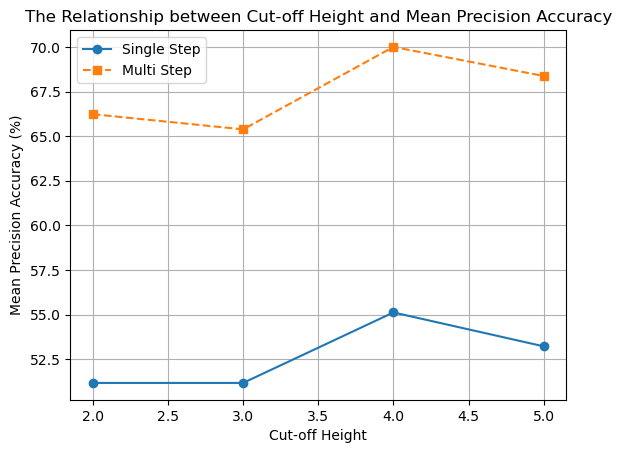

In [79]:
import matplotlib.pyplot as plt

# 截断高度和平均预测准确率的数据
truncation_heights = [2, 3, 4, 5]
single_step_accuracy = [51.17, 51.17, 55.12, 53.22]  # 单步推理的准确率
multi_step_accuracy = [66.23, 65.38, 70, 68.37]   # 多步推理的准确率

# 绘制图表
plt.plot(truncation_heights, single_step_accuracy, marker='o', linestyle='-', label='Single Step')
plt.plot(truncation_heights, multi_step_accuracy, marker='s', linestyle='--', label='Multi Step')

# 添加标题和标签
plt.title('The Relationship between Cut-off Height and Mean Precision Accuracy')
plt.xlabel('Cut-off Height')
plt.ylabel('Mean Precision Accuracy (%)')

# 显示网格
plt.grid(True)

# 添加图例
plt.legend()

# 显示图表
plt.show()

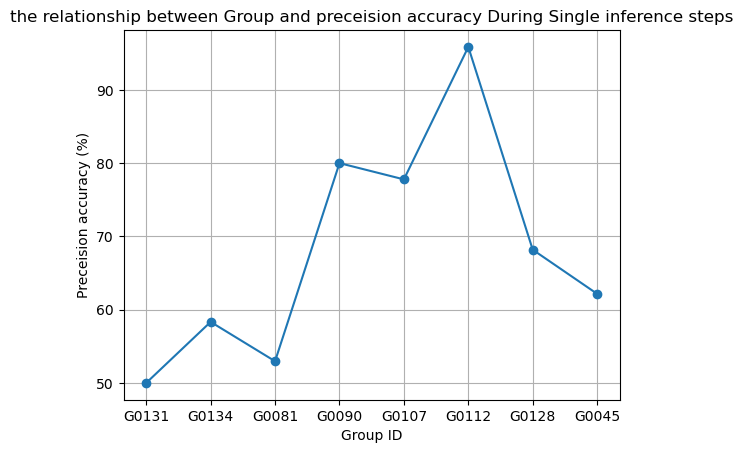

In [17]:
import matplotlib.pyplot as plt

# 截断高度和平均预测准确率的数据
Groups = ['G0131', 'G0134', 'G0081', 'G0090','G0107','G0112','G0128','G0045']
accuracy_percentages = [50, 58.33, 52.96, 80.00,77.78,95.86,68.18,62.16]

# 绘制图表
plt.plot(Groups, accuracy_percentages, marker='o', linestyle='-')

# 添加标题和标签
plt.title('the relationship between Group and preceision accuracy During Single inference steps')
plt.xlabel('Group ID')
plt.ylabel('Preceision accuracy (%)')

# 显示网格
plt.grid(True)

# 显示图表
plt.show()

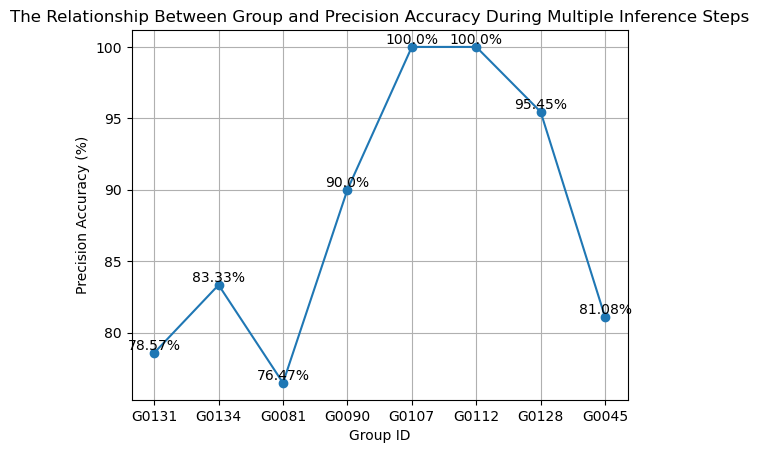

In [19]:
import matplotlib.pyplot as plt

# 截断高度和平均预测准确率的数据
Groups = ['G0131', 'G0134', 'G0081', 'G0090','G0107','G0112','G0128','G0045']
accuracy_percentages = [78.57, 83.33, 76.47, 90.00,100.00,100.00,95.45,81.08]

# 绘制图表
plt.plot(Groups, accuracy_percentages, marker='o', linestyle='-')

# 添加准确度标签
for i, txt in enumerate(accuracy_percentages):
    plt.text(Groups[i], txt, f'{txt}%', ha='center', va='bottom')

# 添加标题和标签
plt.title('The Relationship Between Group and Precision Accuracy During Multiple Inference Steps')
plt.xlabel('Group ID')
plt.ylabel('Precision Accuracy (%)')

# 显示网格
plt.grid(True)

# 显示图表
plt.show()


# 